# Mean Field Inference

In [120]:
import numpy as np
from mlxtend.data import loadlocal_mnist
import matplotlib.pyplot as plt

In [121]:
# load MNIST images

ims, _ = loadlocal_mnist(
        images_path='train-images-idx3-ubyte', 
        labels_path='train-labels-idx1-ubyte')

In [122]:
# find 8 neighbors of a given pixel

def find_neighbor(im, idx, w, h):
    s = w*h
    nbr = []
    if idx < 0 or idx > s-1:
        return nbr
    if idx-1 >= 0 and idx%w != 0:
        nbr.append(idx-1)
    if idx+1 < s and (idx+1)%w != 0:
        nbr.append(idx+1)
    if idx-w >= 0:
        nbr.append(idx-w)
    if idx+w < s:
        nbr.append(idx+w)
    if idx-w-1 >= 0 and idx%w != 0:
        nbr.append(idx-w-1)
    if idx-w+1 >= 0 and (idx+1)%w != 0:
        nbr.append(idx-w+1)
    if idx+w-1 < s and idx%w != 0:
        nbr.append(idx+w-1)
    if idx+w+1 < s and (idx+1)%w != 0:
        nbr.append(idx+w+1)
    return nbr

In [123]:
# Update an image using mean field inference until it converges(update<delta)

def update_image(im, theta_h, theta_x, pi_i, delta):
    temp_im = im.copy()
    temp_pi_i = pi_i.copy()
    diff = 0
    for p in range(im.shape[0]):
        nbr = find_neighbor(im, p, 28, 28)
        q_plus = 0
        q_minus = 0
        for n in nbr:
            q_plus += 0.2 * (2*pi_i[n] - 1 + im[n])
            q_minus += -q_plus
        temp_pi_i[p] = np.exp(q_plus)/(np.exp(q_plus)+np.exp(q_minus))
        if abs(temp_pi_i[p] - pi_i[p]) > diff:
            diff = abs(temp_pi_i[p] - pi_i[p])
        if temp_pi_i[p] > 0.5:
            temp_im[p] = 1
        else:
            temp_im[p] = -1
    im = temp_im
    pi_i = temp_pi_i
    if diff > delta:
        update_image(im, theta_h, theta_x, pi_i, delta)
    return im, pi_i

In [124]:
# take the first 500 MNIST images as original images and denoise 2% pixels randomly

im_in = ims[0:500][:]/255
im_noise = im_in.copy()
rand_idx = np.arange(im_in.shape[1])
for i in range(im_in.shape[0]):
    for j in range(im_in.shape[1]):
        if im_in[i][j]>=0.5:
            im_in[i][j] = 1
            im_noise[i][j] = 1
        else:
            im_in[i][j] = -1
            im_noise[i][j] = -1
    np.random.shuffle(rand_idx)
    for k in range(int(len(rand_idx)*0.02)):
        p = rand_idx[k]
        im_noise[i][p]*=-1

In [125]:
# reconstruct images

pi = np.ones((im_in.shape[0], im_in.shape[1]))*0.5
im_out = im_noise.copy()
delta = 0.001
for i in range(im_out.shape[0]):
    im_out[i], pi[i]= update_image(im_out[i], 0.2, 0.2, pi[i], delta)

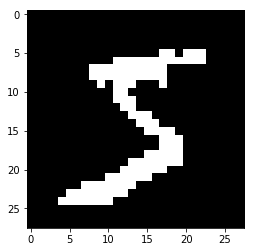

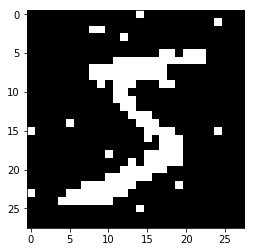

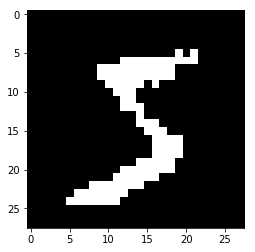

In [129]:
# plot original, noised, denoised images
# replace this image to be most&least accurate reconstructions

plt.figure()
plt.imshow(im_in[0].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_noise[0].reshape(28,28), cmap="gray")
plt.figure()
plt.imshow(im_out[0].reshape(28,28), cmap="gray")

In [130]:
### TO DO: find the most&least accurate reconstructions and plot original, noised, denoised images

In [131]:
### TO DO: plot receiving operating curve